# kmeansclustering 

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [3]:
dataset=pd.read_csv('StudentsPerformance.csv')

In [4]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
X=dataset[dataset.columns[5:8]]
X

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


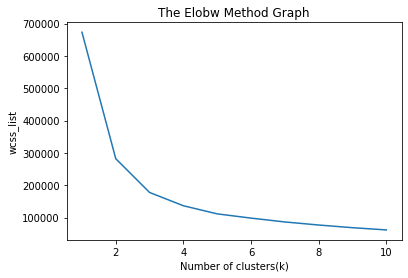

In [8]:
wcss_list= []
  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [9]:
km=KMeans(n_clusters=3)
km.fit(X)
km.labels_
X.columns

Index(['math score', 'reading score', 'writing score'], dtype='object')

Index(['math score', 'reading score', 'writing score'], dtype='object')

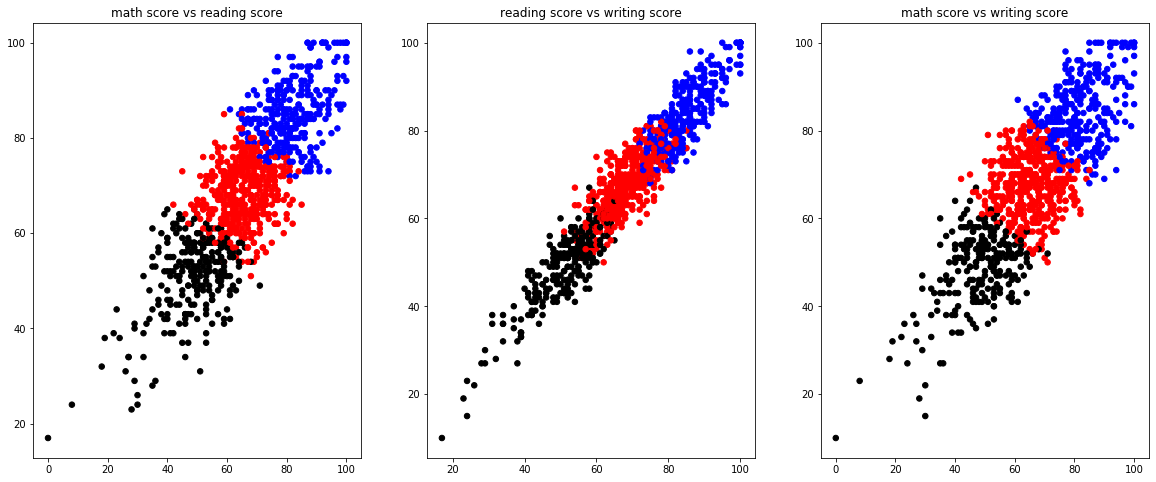

In [10]:
colormap=np.array(['red','blue','black'])
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.scatter(X["math score"],X["reading score"],c=colormap[km.labels_],s=30)
plt.title("math score vs reading score")
plt.subplot(1,3,2)
plt.scatter(X["reading score"],X["writing score"],c=colormap[km.labels_],s=30)
plt.title("reading score vs writing score")
plt.subplot(1,3,3)
plt.scatter(X["math score"],X["writing score"],c=colormap[km.labels_],s=30)
plt.title("math score vs writing score")
X.columns

# hierarchical clustering

In [11]:
dataset


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [12]:
import scipy.cluster.hierarchy as sch

In [13]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='average')

In [14]:
y_hc=hc.fit_predict(X)
y_hc

array([0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0,

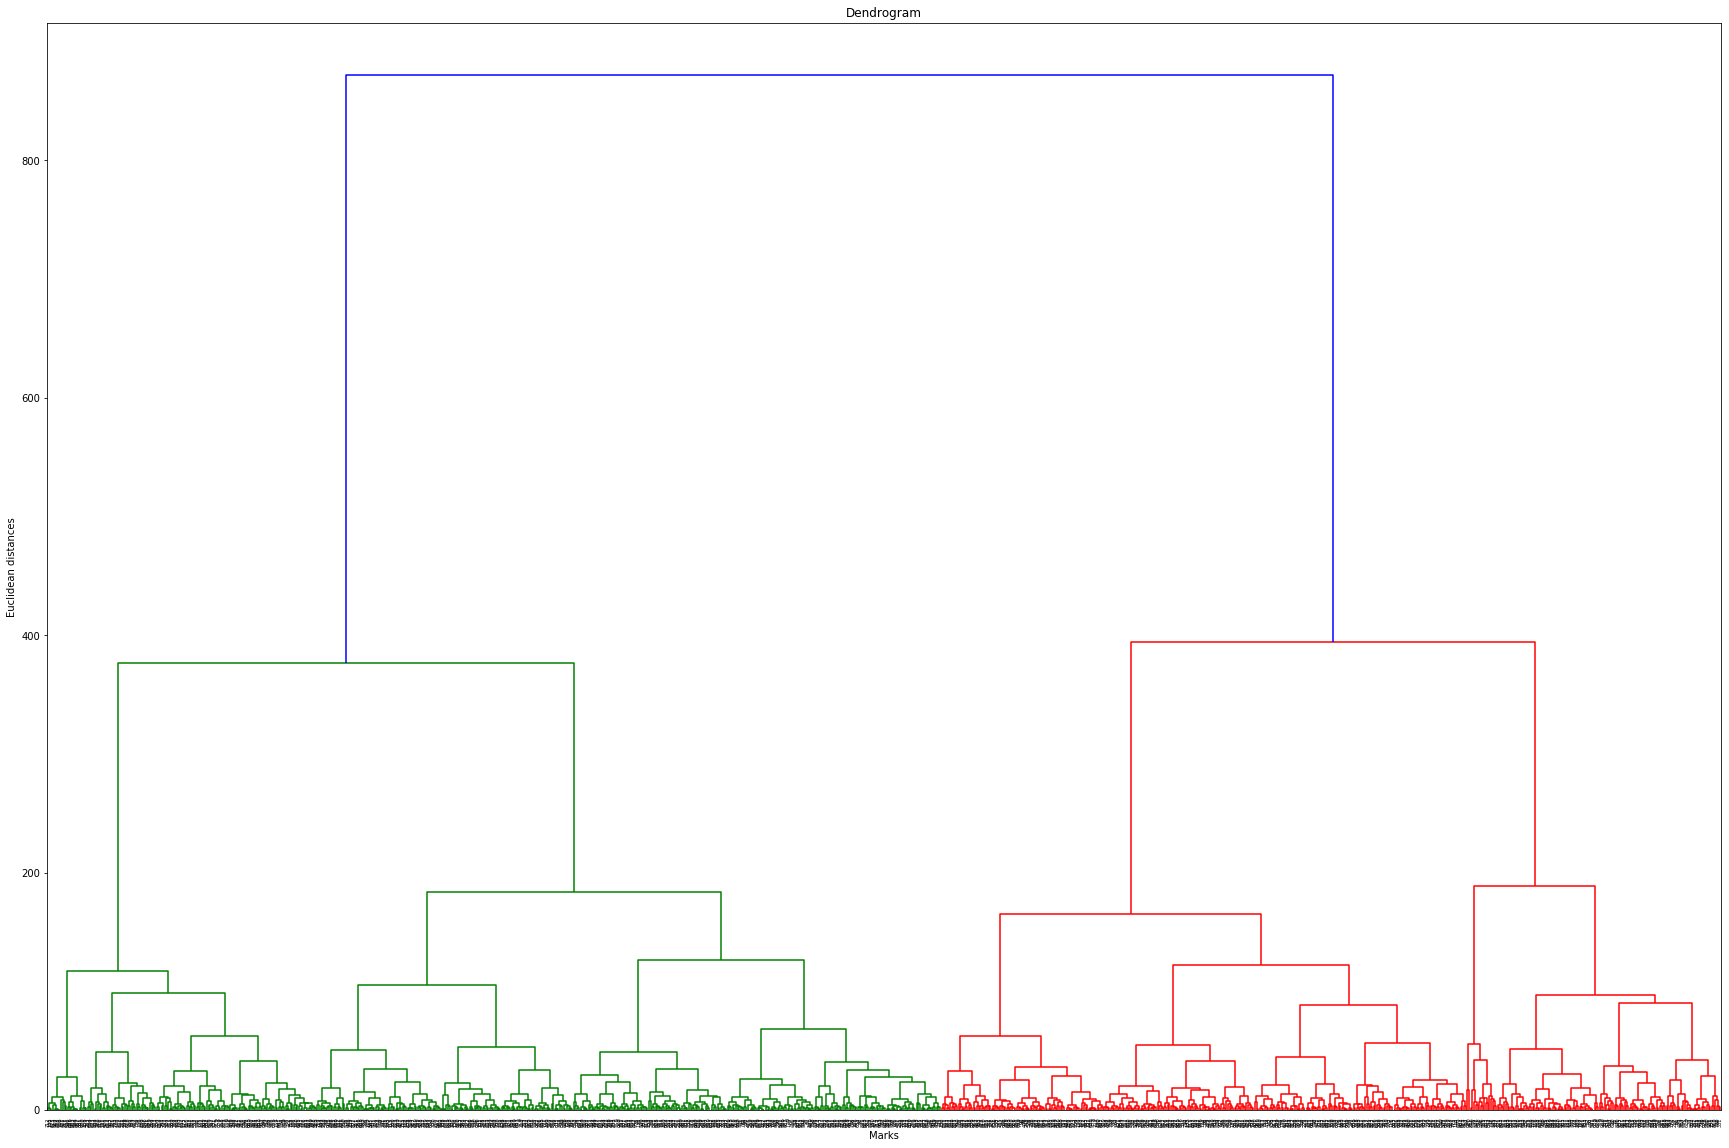

In [15]:
plt.figure(figsize=(30,20))
dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Marks')
plt.ylabel('Euclidean distances')
plt.show()

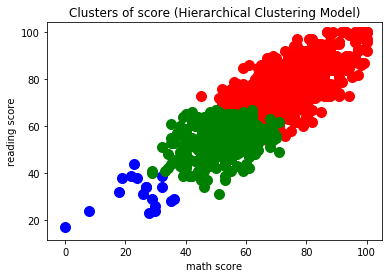

In [16]:
plt.scatter(X[y_hc==0]["math score"], X[y_hc==0]["reading score"], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1]["math score"], X[y_hc==1]["reading score"], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2]["math score"], X[y_hc==2]["reading score"], s=100, c='green', label ='Cluster 3')
plt.title('Clusters of score (Hierarchical Clustering Model)')
plt.xlabel('math score')
plt.ylabel('reading score')
plt.show()


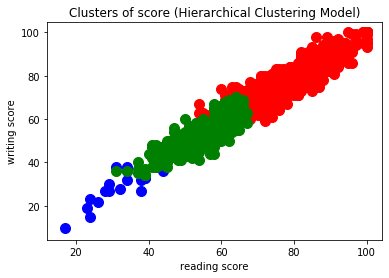

In [17]:
plt.scatter(X[y_hc==0]["reading score"], X[y_hc==0]["writing score"], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1]["reading score"], X[y_hc==1]["writing score"], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2]["reading score"], X[y_hc==2]["writing score"], s=100, c='green', label ='Cluster 3')
plt.title('Clusters of score (Hierarchical Clustering Model)')
plt.xlabel('reading score')
plt.ylabel('writing score')
plt.show()

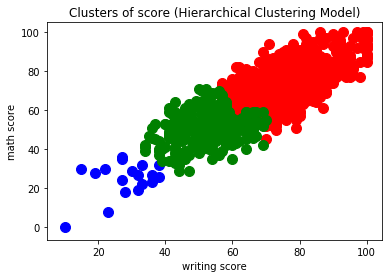

In [18]:
plt.scatter(X[y_hc==0]["writing score"], X[y_hc==0]["math score"], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1]["writing score"], X[y_hc==1]["math score"], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2]["writing score"], X[y_hc==2]["math score"], s=100, c='green', label ='Cluster 3')
plt.title('Clusters of score (Hierarchical Clustering Model)')
plt.xlabel('writing score')
plt.ylabel('math score')
plt.show()

# dbscan


In [19]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [20]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples = 8)
clusters = dbscan.fit_predict(X)

In [23]:
X=dataset.iloc[:,[5,6,7]].values
X

array([[72, 72, 74],
       [69, 90, 88],
       [90, 95, 93],
       ...,
       [59, 71, 65],
       [68, 78, 77],
       [77, 86, 86]], dtype=int64)

In [24]:
dbscan=DBSCAN(eps = 4, min_samples = 8)
clusters=dbscan.fit_predict(X)

In [25]:
clusters

array([ 0, -1,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
       -1,  2,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,
        0, -1, -1, -1,  0,  0,  2, -1, -1,  0,  0,  0,  0,  2,  0,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0, -1,  1,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0, -1,  3,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0, -1,  0

Text(0.5, 1.0, 'DBSCAN')

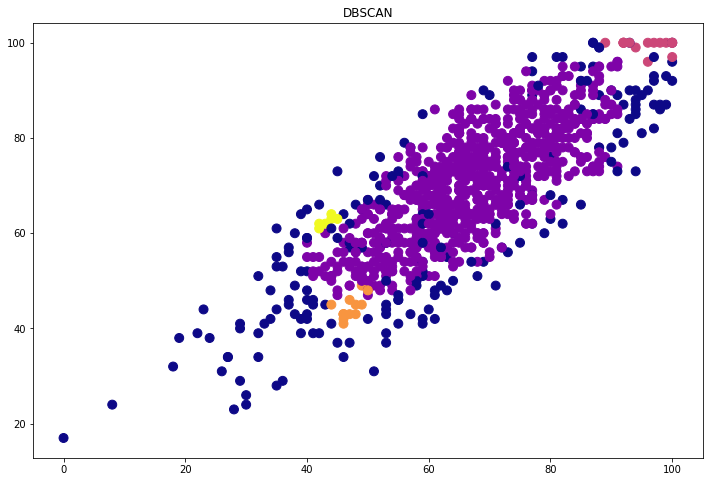

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1],c=clusters, cmap='plasma',s=80)
plt.title('DBSCAN')

Text(0.5, 1.0, 'DBSCAN')

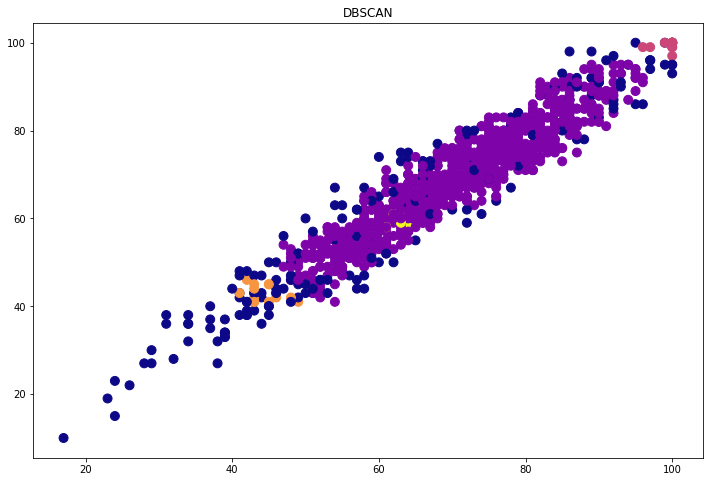

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 1], X[:, 2],c=clusters, cmap='plasma',s=80)
plt.title('DBSCAN')

Text(0.5, 1.0, 'DBSCAN')

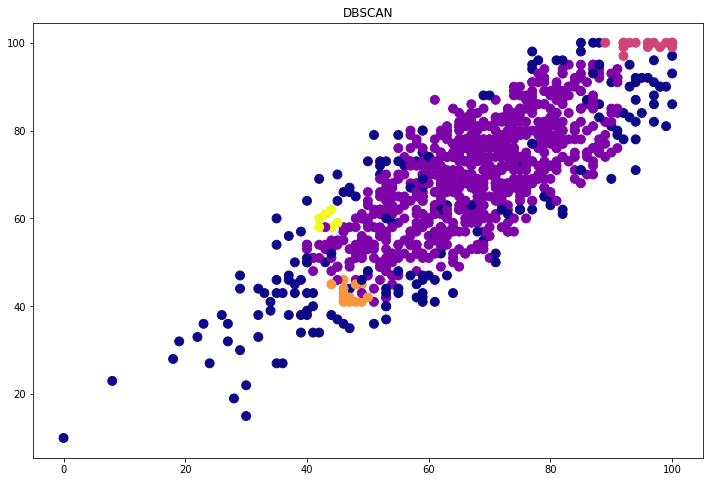

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 2],c=clusters, cmap='plasma',s=80)
plt.title('DBSCAN')